# google cloud permissions

In [ ]:
pip install Cmake

In [ ]:
pip install google-colab

In [ ]:
# Code to read csv file into Colaboratory:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
pip install --upgrade prompt-toolkit

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from pyMechkar.analysis import Table1

# Import from Google Drive (with link)

In [ ]:
link = 'https://drive.google.com/file/d/1pUFYkjNTPRxzQyq9GfC_g-CaDYutXX79/view?usp=sharing'

In [ ]:
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Data_After_knn.csv') 
 
df2 = pd.read_csv('Data_After_knn.csv')
print(df2)

In [ ]:
tab1 = Table1(data=df2, categorize=True)

In [ ]:
tab1

In [ ]:
from pandas.core.algorithms import isin
tab2 = tab1[-(tab1['Categories'].isin(['Mean (SD)','Median (IQR)','Missing (%)','0.0','1.0',0.0,1.0]))]
tab2

Detect the names of the variables that must be converted to one-hot-encoding

In [ ]:
tab2['Variables'].unique()

### One Hot Encoding

In [ ]:
colcat = ['GENDER', 'ETHNICITY', 'pulse_type','FAM_INCOME','EDUCATION','pusle','GLUCOSE','Glucose_basal']

In [ ]:
df2 = pd.get_dummies(df2, columns = colcat)

In [ ]:
coldel = ['Unnamed: 0','SEQN','SBP_first','DBP_first', 'SBP_second', 'DBP_second', 'sw_smoker_cat','sw_cannabis', 'sw_drugs', 'ALBUMIN', 'BUN', 'CALCIO',
       'CHOLESTEROL', 'CREATININE', 'IRON', 'PHOSPHORUS', 'BILIRUBIN','PROTEIN', 'TRIGLYCERIDS', 'URIC_ACID', 'GLOBULIN','Insulin_basal', 'HOMA_beta', 'HOMA_IR', 'sw_diab', 
       'sw_prediab','sw_diabrisk', 'CAD', 'CHF', 'MI', 'STROKE', 'FAMILY_DIAB', 'sw_asthma_ever', 'sw_overweight', 'sw_malignancy', 'RENAL', 'HDL','LDL', 'FOLATE','FERRITIN',
       'BUN_CREATININE','ALBUMIN_CREATININE','URIC_CREATININE','URIC_ALBUMIN','PROTEIN_CREATININE','PROTEIN_ALBUMIN','PROTEIN_GLOBULIN','GLOBULIN_ALBUMIN','PROTEIN_CREATININE',
       'IRON_CREATININE','PROTEIN_CALCIUM','CALCIUM_PHOSPHORUS','PROTEIN_PHOSPHORUS','IRON_PHOSPHORUS','IRON_FOLATE','PULSE_CALCIUM','PULSE_PHOSPHORUS','URIC_PROTEIN',
       'PHOSPHORUS_TRIGLYCERIDS','TRIGLYCERIDS_CHOLESTEROL','CHOLESTEROL_HDL','HDL_TRIGLYCERIDS','DELTA_BP_second']

In [ ]:
df2 = df2.drop(coldel,axis=1)

In [ ]:
df2.dtypes

In [ ]:
df2.dtypes[df2.dtypes != 'float64']

In [ ]:
# df2.loc[:,['pusle','GLUCOSE','Glucose_basal']].describe()

In [ ]:
# colcat =  ['pusle','GLUCOSE','Glucose_basal']
# df2 = pd.get_dummies(df2, columns = colcat)

In [ ]:
tab1 = Table1(data=df2,categorize=True)
tab1

# Feature Selection

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


## Univariate: correlations - Correlation

In [ ]:
X = df2.loc[:, df2.columns != 'WAIST_CIRC']
y = df2['WAIST_CIRC']

In [ ]:
res = {}
for col in X.columns:
   x1 = X[col]
   x2 = y
   rho, pval = stats.spearmanr(x1,x2)
   if pval <= 0.05:
      res[col] = 1
   else:
      res[col] = 0



In [ ]:
res

In [ ]:
varSel = pd.DataFrame({'Univariate': res})
varSel

## Multivariate Feature Selection

In [ ]:
modnames = ['Lasso','RF','GBM','SVM']

In [ ]:
models = {
    "Lasso": Lasso(alpha=0.01,max_iter=1000),
    "RF": RandomForestRegressor(n_estimators=200,max_depth=10),
    "GBM": GradientBoostingRegressor(n_estimators=200,learning_rate=0.01),
    "SVM": LinearSVR(C=0.01,max_iter=10000), 
}

In [ ]:
X = df2.loc[:, df2.columns != 'WAIST_CIRC']
y = df2['WAIST_CIRC']

In [ ]:
## scaling variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
for i in range(0,4):
  print(modnames[i])
  mod = models[modnames[i]].fit(X,y)
  res = SelectFromModel(mod, prefit=True)
  varSel[modnames[i]] = res.get_support().astype('int32')


In [ ]:
varSel['Sum'] =  np.sum(varSel,axis=1)
varSel

In [ ]:
varSel.sum()

In [ ]:
varSel.groupby(['Sum']).count()['Univariate']

In [ ]:
varSel[varSel['Sum'] >= 3]

In [ ]:
varSel[varSel['Sum'] >= 3].index

In [ ]:
selected_vars = ['AGE', 'ALBUMIN_CREATININE_2', 'ALBUMIN_CREATININE_3', 'BILIRUBIN_0',
       'BUN_1', 'CHOLESTEROL_3', 'CHOLESTEROL_HDL_0', 'CHOLESTEROL_HDL_3',
       'DBP_first_0', 'DBP_second_1', 'DELTA_BP_second_1', 'EDUCATION_5.0',
       'ETHNICITY_1.0', 'FAM_INCOME_15.0', 'GENDER_2.0', 'GLOBULIN_ALBUMIN_0',
       'GLUCOSE_0', 'GLUCOSE_3.9-5.5', 'GLUCOSE_5.6-6.98', 'GLUCOSE_>11.1',
       'Glucose_basal_100-125', 'Glucose_basal_2', 'Glucose_basal_70-99',
       'IRON_3', 'IRON_FOLATE_0', 'IRON_PHOSPHORUS_2', 'PHOSPHORUS_3',
       'PROTEIN_2', 'PROTEIN_ALBUMIN_1', 'SBP_first_0', 'SBP_first_3',
       'TRIGLYCERIDS_CHOLESTEROL_3', 'URIC_ACID_1', 'URIC_ACID_3',
       'URIC_ACID_5', 'URIC_ALBUMIN_1', 'lymphocyte_pct']

In [ ]:
df2 = df2.loc[:,selected_vars]
df2

In [ ]:
df2.to_csv("wc_selected.csv",index=False)

In [ ]:
from pyMechkar.analysis import train_test

In [ ]:
temp, test = train_test(data=df2,prop=0.8,seed=2,tableone=True)

In [ ]:
test.to_csv("test.csv",index=False)

In [ ]:
train, eval = train_test(data=temp,prop=0.7,seed=1,tableone=True)

In [ ]:
train.to_csv("train.csv",index=False)
eval.to_csv("eval.csv",index=False)

In [ ]:
print(train.shape)
print(eval.shape)
print(test.shape)


# Progress

In [113]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv') 
eval = pd.read_csv('eval.csv')
test= pd.read_csv('test.csv')

In [3]:
train

,AGE,HEIGHT,WEIGHT,BMI,age_first_smoke,neutrophil_pct,sw_insulin,sw_oral_antidiab,BUN_CREATININE_0,ALBUMIN_CREATININE_1,...,HOMA_IR_1,HDL_1,FOLATE_2,GENDER_1.0,ETHNICITY_1.0,ETHNICITY_3.0,ETHNICITY_4.0,ETHNICITY_5.0,EDUCATION_4.0,WAIST_CIRC
0,37.0,176.4,70.6,22.70,0.0,63.2,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,0,1,0,84.5
1,45.0,176.7,70.2,22.48,28.0,57.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,0,0,1,0,0,81.4
2,72.0,150.8,57.1,25.11,0.0,65.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,87.5
3,25.0,185.0,156.0,45.60,7.0,57.1,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1,0,1,0,0,0,146.2
4,46.0,160.6,68.4,26.50,31.0,51.6,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16377,74.0,157.3,93.2,37.70,0.0,56.3,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0,1,0,0,0,0,115.3
16378,60.0,147.5,100.3,46.10,0.0,69.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,121.6
16379,66.0,175.6,82.5,26.80,53.0,51.2,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1,0,0,1,0,0,95.5
16380,68.0,183.1,101.3,30.22,45.0,60.6,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1,0,0,1,0,1,112.8


In [24]:
x_train = train.iloc[:,:-1]
y_train=train.iloc[:,-1]

In [25]:
x_eval=eval.iloc[:,:-1]
y_eval=eval.iloc[:,-1]

In [26]:
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [185]:
def grid_search(estimator,param_grid):
    grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='neg_root_mean_squared_error')
    grid_result = grid.fit(x_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

In [186]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search(Ridge(),param_grid)

Best Score:  -5.0753904759273984
Best Params:  {'alpha': 100}


In [187]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search(Lasso(),param_grid)

Best Score:  -5.076175528018658
Best Params:  {'alpha': 0.001}


In [188]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'l1_ratio':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search(ElasticNet(),param_grid)

Best Score:  -5.075407845746542
Best Params:  {'alpha': 0.01, 'l1_ratio': 0}


In [44]:

models = {
    "Lasso": Lasso(alpha=0.001),
    "RF": RandomForestRegressor(),
    "GBM": GradientBoostingRegressor(),
    "SVM": LinearSVR(), 
    "LR":LinearRegression(),
    "DTR":DecisionTreeRegressor(),
    "AB":AdaBoostRegressor(),
    "Ridge":Ridge(alpha=100),
    "ENet":ElasticNet(alpha=0.01,l1_ratio=0)

}

In [45]:
df_score=pd.DataFrame(columns=['model_name','RMSE_train_score','RMSE_eval_score'])

In [46]:
regr=LinearRegression()
regr.fit(x_train,y_train)

train_pred =regr.predict(x_train)
train_rmse= sqrt(mean_squared_error(y_train,train_pred))
print(train_rmse)

eval_pred = regr.predict(x_eval)
eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) 
print(eval_rmse)

5.060817332168945
5.024159382021524


In [47]:
list_name=list()
list_train=[]
list_eval=[]
for name,model in models.items():
    regr=model

    regr.fit(x_train,y_train)
    train_pred =regr.predict(x_train)
    train_rmse= sqrt(mean_squared_error(y_train,train_pred)) #calculate rmse

    eval_pred = regr.predict(x_eval)
    eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) #calculate rmse

    list_name.append(name)
    list_train.append(train_rmse)
    list_eval.append(eval_rmse)
df_score['model_name']=list_name
df_score['RMSE_train_score']=list_train
df_score['RMSE_eval_score']=list_eval

In [48]:
df_score

,model_name,RMSE_train_score,RMSE_eval_score
0,Lasso,5.060844,5.023742
1,RF,1.906307,5.092432
2,GBM,4.733451,4.911023
3,SVM,9.232784,9.127026
4,LR,5.060817,5.024159
5,DTR,0.000000,7.225770
6,AB,6.498688,6.491210
7,Ridge,5.061279,5.023707
8,ENet,5.061900,5.023906


In [49]:
df_score.to_csv("Scores.csv")

In [53]:
print(4.733451/4.911023)


0.963842156715617


In [52]:
best_RMSE=0
min_RMSE=np.Inf

for i in range(len(df_score)):
    if (df_score['RMSE_train_score'][i] / df_score['RMSE_eval_score'][i])>0.99:
       if min_RMSE>df_score['RMSE_eval_score'][i]:
            min_RMSE=df_score['RMSE_eval_score'][i]
            best_RMSE=(df_score['RMSE_train_score'][i] / df_score['RMSE_eval_score'][i])
            name=df_score['model_name'][i]

print(best_RMSE)
print(min_RMSE)
print(name)
# I tried with default settings in the machine learning models

1.0074790850243998
5.023706601310963
Ridge


Ridge selected to be the best model.

In [189]:
param_test1 = {'max_iter': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search(Ridge(),param_test1)

Best Score:  -5.076392954496901
Best Params:  {'max_iter': 1}


In [190]:
param_test2 = {'normalize':[True, False]}
grid_search(Ridge(),param_test2)

Best Score:  -5.076392954496901
Best Params:  {'normalize': False}


In [191]:
param_test3 = {'solver':["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}
grid_search(Ridge(),param_test3)

Best Score:  -5.075679981381076
Best Params:  {'solver': 'saga'}


In [192]:
regr=Ridge()# defualt makes the best pred
regr.fit(x_train,y_train)

train_pred =regr.predict(x_train)
train_rmse= sqrt(mean_squared_error(y_train,train_pred))
print(train_rmse)

eval_pred = regr.predict(x_eval)
eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) 
print(eval_rmse)

5.060817392464518
5.024147716490883


In [193]:
regr=Ridge()
regr.fit(x_train,y_train)

train_pred =regr.predict(x_train)
train_rmse= sqrt(mean_squared_error(y_train,train_pred))
print(train_rmse)

eval_pred = regr.predict(x_eval)
eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) 
print(eval_rmse)

test_pred = regr.predict(x_test)
test_rmse = sqrt(mean_squared_error(y_test,test_pred)) 
print(test_rmse)

5.060817392464518
5.024147716490883
4.873206572948329


In [179]:
d = {'model_name': ['Ridge'], 'RMSE_train_score': [train_rmse],'RMSE_eval_score':[eval_rmse],'RMSE_test_score':[test_rmse]}

In [180]:
df_results=pd.DataFrame(data=d)

In [181]:
df_results.to_csv("Final_Results.csv")

In [168]:
eval_pred = eval_pred.tolist()

In [169]:
df_eval = pd.DataFrame(data = {'y_eval':y_eval.values.tolist(),'eval_pred':eval_pred})

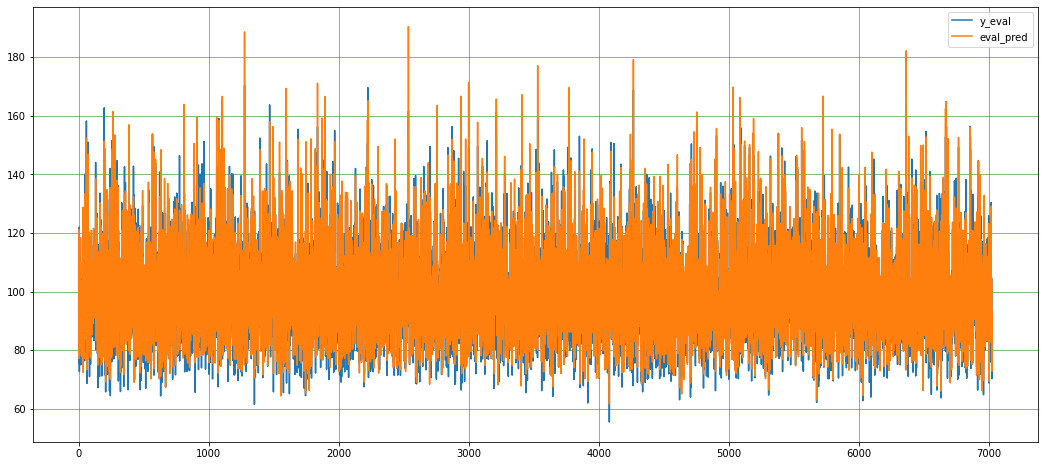

In [171]:
df_eval.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [176]:
coff=regr.coef_.tolist()

In [177]:
coff

[0.159027037436548,
 -0.14316810073041566,
 0.5109977087946168,
 0.6642785921331759,
 0.026815616022303073,
 0.025207104646171992,
 1.4878783735126404,
 1.43154148672343,
 -0.04832602621067683,
 -0.5222128185827642,
 0.8888255708980841,
 0.1664993121999166,
 0.09985617151914734,
 0.38465420727906846,
 0.08460744299535866,
 0.10266866145663159,
 0.28378427803256084,
 0.6196894578432144,
 0.13799828072234427,
 0.3051116525670926,
 0.1257921890879301,
 0.6205631159860671,
 0.6284643481110423,
 0.20046697690001997,
 0.17038647724882944,
 0.20849798224685157,
 0.03982091023154581,
 -0.12896480471800548,
 0.14476675907835307,
 0.03950329967056888,
 -0.9085904359318556,
 -0.5769685877072217,
 0.18700590228708924,
 0.756162517535586,
 0.48912467743479665,
 0.24010752500760194,
 0.24462708294052807,
 0.8779255162531832,
 0.47528685112449504,
 -1.6778624125373525,
 -0.41907906336889483,
 -0.10206619233275893]

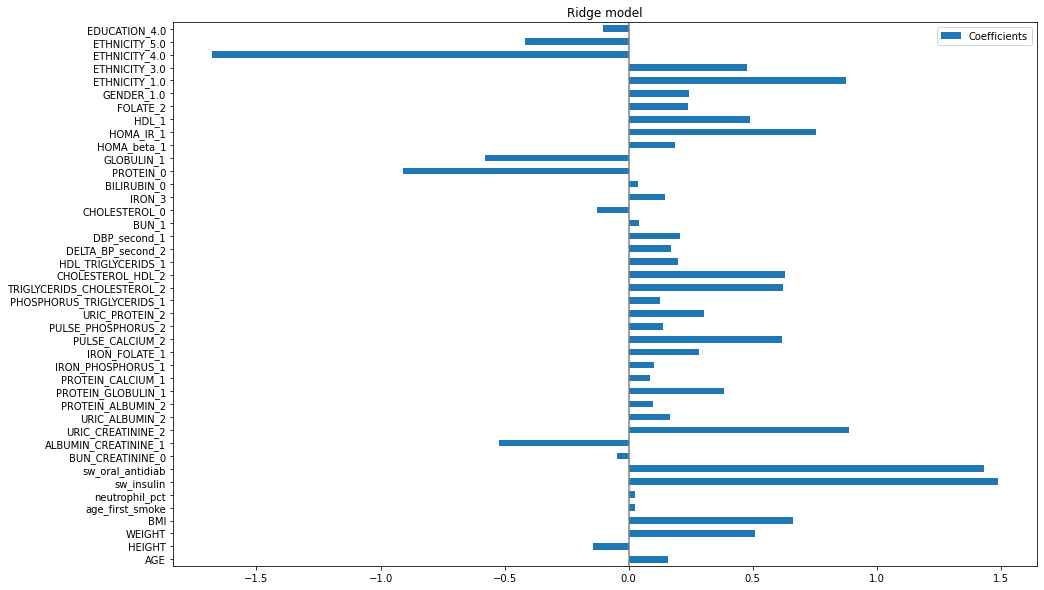

In [178]:
coefs = pd.DataFrame(
   coff,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(20, 10))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

GradientBoostingRegressor selected to be second the best model.

n_estimators lead to overfitting 

In [57]:
param_test1 = {'n_estimators':range(80,200,10)}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test1, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# lead to overfit

Best Score:  -4.912897623816767
Best Params:  {'n_estimators': 190}


changing the max_depth and min_samples_split lead to overfit

In [58]:
param_test2 = {'max_depth':range(3,10,2), 'min_samples_split':range(2,10,2)}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test2, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


# make it worst

Best Score:  -4.930299655296748
Best Params:  {'max_depth': 3, 'min_samples_split': 6}


In [54]:
param_test3 = {'min_samples_split':range(2,10,2), 'min_samples_leaf':range(1,10,1)}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test3, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# make it worst

Best Score:  -4.92995129571211
Best Params:  {'min_samples_leaf': 3, 'min_samples_split': 8}


In [99]:
param_test4 = {'max_features':range(0,10,2)}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test4, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


# make it worst

Best Score:  -5.081725708608737
Best Params:  {'max_features': 8}


In [101]:
param_test5 = {'subsample':[0.9,1.0,1.1]}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test5, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


# make it worst

Best Score:  -4.930561824178186
Best Params:  {'subsample': 1.0}


In [104]:
param_test6 = {'alpha':[0.001, 0.01, 0.1,0.9, 1, 10, 100, 1000]}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test6, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


# make it worst

Best Score:  -4.930532911947881
Best Params:  {'alpha': 0.001}


In [105]:
param_test7 ={'learning_rate':[0.001, 0.01, 0.1,0.9, 1, 10, 100, 1000]}
gsearch = GridSearchCV(estimator = GradientBoostingRegressor(), 
param_grid = param_test7, scoring='neg_root_mean_squared_error')
grid_result = gsearch.fit(x_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


# make it worst

Best Score:  -4.930837548376227
Best Params:  {'learning_rate': 0.1}


In [106]:
regr=GradientBoostingRegressor(n_estimators=100,min_samples_leaf=8, max_depth=3)
regr.fit(x_train,y_train)

train_pred =regr.predict(x_train)
train_rmse= sqrt(mean_squared_error(y_train,train_pred))
print(train_rmse)

eval_pred = regr.predict(x_eval)
eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) 
print(eval_rmse)

4.740073173181233
4.909567293198531


In [107]:
print(train_rmse/eval_rmse)

0.965476770172372


In [81]:
regr=GradientBoostingRegressor(n_estimators=100,min_samples_leaf=8, max_depth=3)
regr.fit(x_train,y_train)

train_pred =regr.predict(x_train)
train_rmse= sqrt(mean_squared_error(y_train,train_pred))
print(train_rmse)

eval_pred = regr.predict(x_eval)
eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) 
print(eval_rmse)

test_pred = regr.predict(x_test)
test_rmse = sqrt(mean_squared_error(y_test,test_pred)) 
print(test_rmse)

4.740073173181233
4.909567293198531
4.839246923660209


In [82]:
d = {'model_name': ['GradientBoostingRegressor'], 'RMSE_train_score': [train_rmse],'RMSE_eval_score':[eval_rmse],'RMSE_test_score':[test_rmse]}

<!-- LinearRegression does not have hyperparameters that can be tuned -->

In [ ]:
# regr=LinearRegression()
# regr.fit(x_train,y_train)

# train_pred =regr.predict(x_train)
# train_rmse= sqrt(mean_squared_error(y_train,train_pred))
# print(train_rmse)

# eval_pred = regr.predict(x_eval)
# eval_rmse = sqrt(mean_squared_error(y_eval,eval_pred)) 
# print(eval_rmse)

# test_pred = regr.predict(x_test)
# test_rmse = sqrt(mean_squared_error(y_test,test_pred)) 
# print(test_rmse)

In [ ]:
# list_=[['LinearRegression'],[train_rmse],[eval_rmse],[test_rmse]]
# d = {'model_name': ['LinearRegression'], 'RMSE_train_score': [train_rmse],'RMSE_eval_score':[eval_rmse],'RMSE_test_score':[test_rmse]}

In [83]:
df_results=pd.DataFrame(data=d)

In [84]:
df_results

,model_name,RMSE_train_score,RMSE_eval_score,RMSE_test_score
0,GradientBoostingRegressor,4.740073,4.909567,4.839247


In [85]:
df_results.to_csv("Final_Results.csv")

In [87]:
eval_pred = eval_pred.tolist()

In [89]:
# for i in range(len(eval_pred)):
#     print(eval_pred[i][0])
#     eval_pred[i]=eval_pred[i][0]

TypeError: 'float' object is not subscriptable

In [95]:
df_eval = pd.DataFrame(data = {'y_eval':y_eval.values.tolist(),'eval_pred':eval_pred})

In [96]:
df_eval

,y_eval,eval_pred
0,92.0,94.509421
1,104.5,110.355934
2,75.6,76.727966
3,122.0,122.023652
4,72.7,78.208818
...,...,...
7017,93.6,99.865914
7018,104.7,105.383571
7019,101.2,104.012271
7020,70.3,72.985364


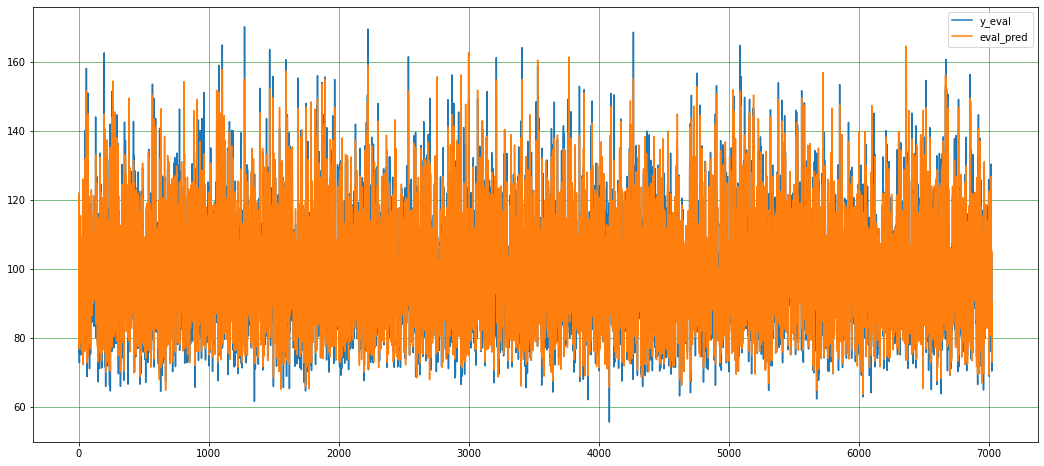

In [97]:
df_eval.plot(kind='line',figsize=(18,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [98]:
# coff=regr.coef_[0].tolist()

AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'

In [ ]:
# coefs = pd.DataFrame(
#    coff,
#    columns=['Coefficients'], index=x_train.columns
# )

# coefs.plot(kind='barh', figsize=(9, 7))
# plt.title('Ridge model')
# plt.axvline(x=0, color='.5')
# plt.subplots_adjust(left=.3)

In [117]:
params = {
    "n_estimators": 100,
    "max_depth": 3,
    "min_samples_leaf": 8,
    "loss": "squared_error",
}

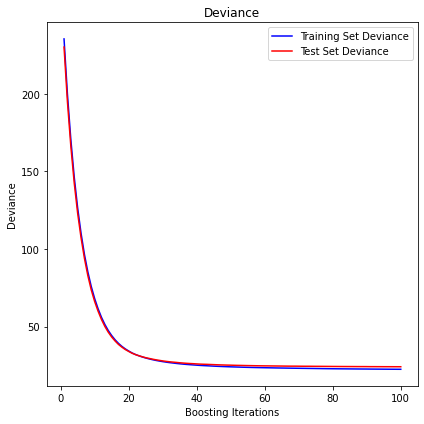

In [122]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, eval_pred_plt in enumerate(regr.staged_predict(x_eval)):
    test_score[i] = regr.loss_(y_eval, eval_pred_plt)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    regr.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

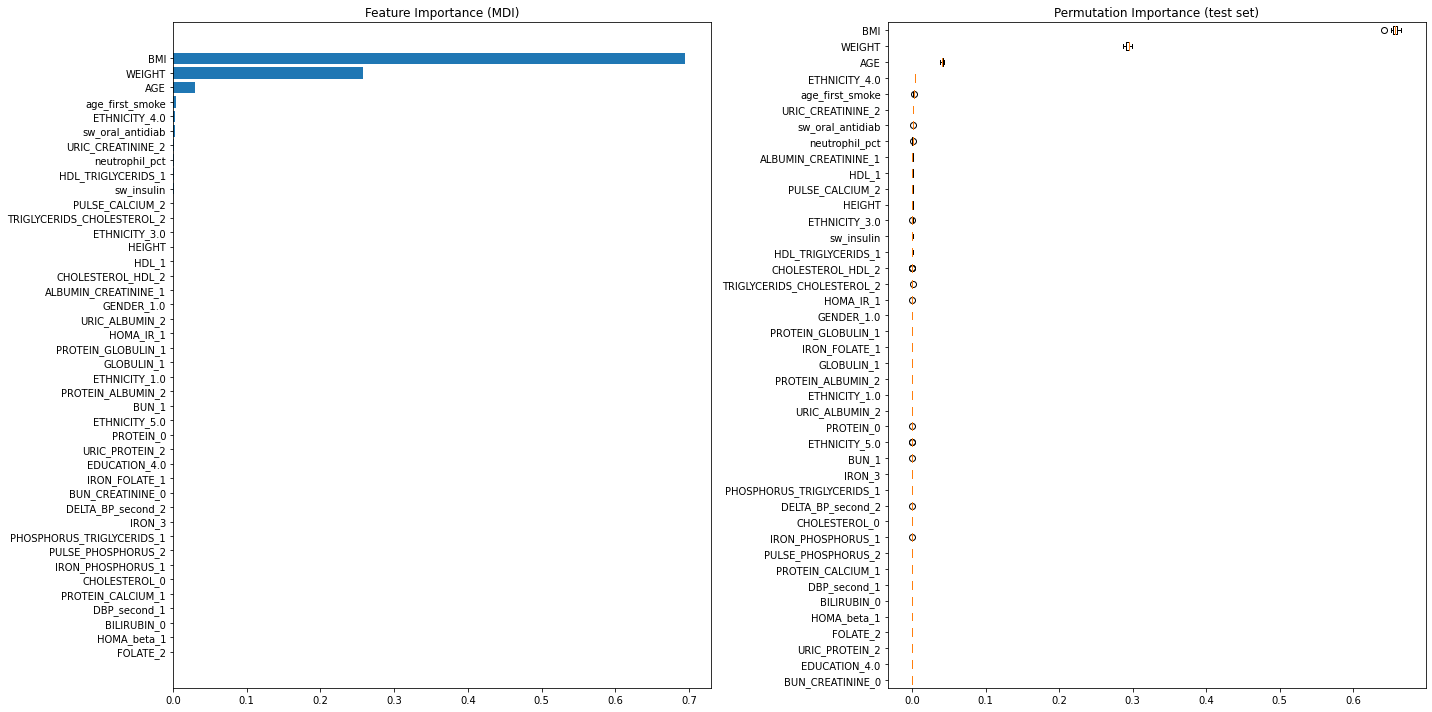

In [123]:
feature_importance = regr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(regr, x_test, y_test, n_repeats=10, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(train.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()